## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## IDENTIFYING THE PATH

In [2]:
path = r'C:\Users\gryzu\12.03.2023 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\gryzu\\12.03.2023 Instacart Basket Analysis'

## IMPORTING DATASETS 

In [4]:
#Importing Dataset with normal activity customers
path_to_pickle = os.path.join(path, '02 Data', 'Prepared Data', 'norm_act_customers.pkl')

In [5]:
norm_act_customers = pd.read_pickle(path_to_pickle)

In [6]:
norm_act_customers.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,_merge,region_loc,exclusion_flag
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,2543867,5,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal-activity customers
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal-activity customers
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal-activity customers
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal-activity customers
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal-activity customers


In [7]:
norm_act_customers = norm_act_customers.drop(columns=['_merge'])

In [8]:
# Importing Wrangled department Data Set
dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [9]:
dep.head(20)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
# Giving a name to Unnamed column
dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

# STEP 5

We need to merge Departments and Normal Activity Customer Tables 

In [11]:
customer_profiling_table = norm_act_customers.merge(dep, on = 'department_id')

In [12]:
# Checking updated profiling table
customer_profiling_table.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,region_loc,exclusion_flag,department
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,2543867,5,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-activity customers,beverages
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-activity customers,beverages
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-activity customers,beverages
3,33890,Female,New Mexico,36,2017-01-01,0,single,59285,1044841,3,...,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,normal-activity customers,beverages
4,33890,Female,New Mexico,36,2017-01-01,0,single,59285,474720,4,...,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,normal-activity customers,beverages


#### CUSTOMER PROFILING BASED ON AGE INDICATOR

In [13]:
customer_profiling_table[['age', 'number_of_dependants', 'income']].describe()

,age,number_of_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,1.501819e+00,9.967587e+04
std,1.848528e+01,1.118896e+00,4.314187e+04
min,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.300000e+01,1.000000e+00,6.729200e+04
50%,4.900000e+01,2.000000e+00,9.676500e+04
75%,6.500000e+01,3.000000e+00,1.281020e+05
max,8.100000e+01,3.000000e+00,5.939010e+05


We can see that the minimal age is 18 and maximal age is 81. We could create two age-groups: 1) Under 50 Years Old and 2) Over 50 Years Old

In [14]:
# Under 50 Years Old
customer_profiling_table.loc[(customer_profiling_table['age'] >= 18) & (customer_profiling_table['age'] <= 50), 'age_group'] = 'Under 50 Years Old'

In [15]:
# Over 50 Years Old
customer_profiling_table.loc[customer_profiling_table['age'] >= 50, 'age_group'] = 'Over 50 Years Old'

In [16]:
# Checking age groups:
customer_profiling_table['age_group'].value_counts(dropna = False)

age_group
Under 50 Years Old    15548289
Over 50 Years Old     15416275
Name: count, dtype: int64

#### CUSTOMER PROFILING BASED ON INCOME INDICATOR

Based on the summary statistics provided for the income column, we can determine the income groups as follows:

1) Low Income: Income values up to the 25th percentile (less than or equal to 67,292 US))

2) Middle Income: Income values between the 25th and 75th percentiles (between 67,292 USD and 128,102 USD)

3) High Income: Income values above the 75th percentile (greater than 128,102 USD),102)

In [17]:
# Create a new column 'income_group' based on income levels
customer_profiling_table.loc[customer_profiling_table['income'] <= 67292, 'income_group'] = 'Low Income'
customer_profiling_table.loc[(customer_profiling_table['income'] > 67292) & (customer_profiling_table['income'] <= 128102), 'income_group'] = 'Middle Income'
customer_profiling_table.loc[customer_profiling_table['income'] > 128102, 'income_group'] = 'High Income'

In [18]:
print(customer_profiling_table[['age', 'number_of_dependants', 'income', 'age_group', 'income_group']])

          age  number_of_dependants  income           age_group   income_group
0          48                     3  165665  Under 50 Years Old    High Income
1          48                     3  165665  Under 50 Years Old    High Income
2          48                     3  165665  Under 50 Years Old    High Income
3          36                     0   59285  Under 50 Years Old     Low Income
4          36                     0   59285  Under 50 Years Old     Low Income
...       ...                   ...     ...                 ...            ...
30964559   43                     3  116924  Under 50 Years Old  Middle Income
30964560   24                     2   73357  Under 50 Years Old  Middle Income
30964561   24                     2   73357  Under 50 Years Old  Middle Income
30964562   24                     2   73357  Under 50 Years Old  Middle Income
30964563   24                     2   73357  Under 50 Years Old  Middle Income

[30964564 rows x 5 columns]


In [19]:
# Checking income groups:
customer_profiling_table['income_group'].value_counts(dropna = False)

income_group
Middle Income    15482125
Low Income        7741348
High Income       7741091
Name: count, dtype: int64

#### CUSTOMER PROFILING BASED ON NUMBER OF DEPENDANDS AND FAMILY STATUS

In [20]:
# Checking family status groups:
customer_profiling_table['family_status'].value_counts(dropna = False)

family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

We could create two groups of people: Those who don't have children (number of dependands is equal to 0) and those who do have (number of dependands is equal or higher to 1)

In [21]:
customer_profiling_table.loc[customer_profiling_table['number_of_dependants'] == 0, 'kids'] = 'No kids'

In [22]:
customer_profiling_table.loc[customer_profiling_table['number_of_dependants'] >= 1, 'kids'] = 'With kids'

In [23]:
# Checking children status groups:
customer_profiling_table['kids'].value_counts(dropna = False)

kids
With kids    23224883
No kids       7739681
Name: count, dtype: int64

#### MIXED CUSTOMER PROFILING BASED ON NUMBER OF CHILDREN, FAMILY STATUS AND AGE

We can distinguish these different groups of people: 

Single Younger Group of People (lower than 50 years old) with kids 

Single Younger Group of People (lower than 50 years old) with no kids 

Married/Partnered Younger Group of People (lower than 50 years old) with kids 

Married/Partnered Younger Group of People (lower than 50 years old) with no kids 

Single Older Group of People (higher than 50 years old) with kids 

Single Older Group of People (higher than 50 years old) with no kids 

Married/Partnered Older Group of People (higher than 50 years old) with kids 

Married/Partnered Older Group of People (higher than 50 years old) with no kids
 no kids



In [24]:
# Single Younger Group of People (lower than 50 years old) with kids
customer_profiling_table.loc[(customer_profiling_table['family_status'] == 'single') & 
                             (customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['kids'] == 'With kids'), 'age_status_profile'] = 'Single Younger Group with Kids'

# Single Younger Group of People (lower than 50 years old) with no kids
customer_profiling_table.loc[(customer_profiling_table['family_status'] == 'single') & 
                             (customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['kids'] == 'No kids'), 'age_status_profile'] = 'Single Younger Group with No Kids'

# Married/Partnered Younger Group of People (lower than 50 years old) with kids
customer_profiling_table.loc[((customer_profiling_table['family_status'] == 'married') |
                              (customer_profiling_table['family_status'] == 'living with parents and siblings')) & 
                             (customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['kids'] == 'With kids'), 'age_status_profile'] = 'Married/Partnered Younger Group with Kids'

# Married/Partnered Younger Group of People (lower than 50 years old) with no kids
customer_profiling_table.loc[((customer_profiling_table['family_status'] == 'married') |
                              (customer_profiling_table['family_status'] == 'living with parents and siblings')) & 
                             (customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['kids'] == 'No kids'), 'age_status_profile'] = 'Married/Partnered Younger Group with No Kids'

# Single Older Group of People (higher than 50 years old) with kids
customer_profiling_table.loc[(customer_profiling_table['family_status'] == 'single') & 
                             (customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['kids'] == 'With kids'), 'age_status_profile'] = 'Single Older Group with Kids'

# Single Older Group of People (higher than 50 years old) with no kids
customer_profiling_table.loc[(customer_profiling_table['family_status'] == 'single') & 
                             (customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['kids'] == 'No kids'), 'age_status_profile'] = 'Single Older Group with No Kids'

# Married/Partnered Older Group of People (higher than 50 years old) with kids
customer_profiling_table.loc[((customer_profiling_table['family_status'] == 'married') |
                              (customer_profiling_table['family_status'] == 'living with parents and siblings')) & 
                             (customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['kids'] == 'With kids'), 'age_status_profile'] = 'Married/Partnered Older Group with Kids'

# Married/Partnered Older Group of People (higher than 50 years old) with no kids
customer_profiling_table.loc[((customer_profiling_table['family_status'] == 'married') |
                              (customer_profiling_table['family_status'] == 'living with parents and siblings')) & 
                             (customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['kids'] == 'No kids'), 'age_status_profile'] = 'Married/Partnered Older Group with No Kids'

In [25]:
print(customer_profiling_table[['family_status', 'age', 'kids', 'age_status_profile']])

         family_status  age       kids  \
0              married   48  With kids   
1              married   48  With kids   
2              married   48  With kids   
3               single   36    No kids   
4               single   36    No kids   
...                ...  ...        ...   
30964559       married   43  With kids   
30964560       married   24  With kids   
30964561       married   24  With kids   
30964562       married   24  With kids   
30964563       married   24  With kids   

                                 age_status_profile  
0         Married/Partnered Younger Group with Kids  
1         Married/Partnered Younger Group with Kids  
2         Married/Partnered Younger Group with Kids  
3                 Single Younger Group with No Kids  
4                 Single Younger Group with No Kids  
...                                             ...  
30964559  Married/Partnered Younger Group with Kids  
30964560  Married/Partnered Younger Group with Kids  
30964561 

In [26]:
customer_profiling_table['age_status_profile'].value_counts(dropna = False)

age_status_profile
Married/Partnered Younger Group with Kids    11673980
Married/Partnered Older Group with Kids      11550903
Single Younger Group with No Kids             3874309
nan                                           2645271
Single Older Group with No Kids               1220101
Name: count, dtype: int64

#### MIXED CUSTOMER PROFILING BASED ON AGE AND INCOME

Here we can distinguish between these groups:

Younger People (Under 50 Years Old) with Low Income

Younger People (Under 50 Years Old) with Middle Income

Younger People (Under 50 Years Old) with High Income 

Older People (Over 50 Years Old) with Low Income

Older People (Over 50 Years Old) with Middle Income

Older People (Over 50 Years Old) with High Income

In [27]:
# Younger People (Under 50 Years Old) with Low Income
customer_profiling_table.loc[(customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['income_group'] == 'Low Income'), 'age_income_profile'] = 'Younger People with Low Income'

# Younger People (Under 50 Years Old) with Middle Income
customer_profiling_table.loc[(customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['income_group'] == 'Middle Income'), 'age_income_profile'] = 'Younger People with Middle Income'

# Younger People (Under 50 Years Old) with High Income
customer_profiling_table.loc[(customer_profiling_table['age'] < 50) & 
                             (customer_profiling_table['income_group'] == 'High Income'), 'age_income_profile'] = 'Younger People with High Income'

# Older People (Over 50 Years Old) with Low Income
customer_profiling_table.loc[(customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['income_group'] == 'Low Income'), 'age_income_profile'] = 'Older People with Low Income'

# Older People (Over 50 Years Old) with Middle Income
customer_profiling_table.loc[(customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['income_group'] == 'Middle Income'), 'age_income_profile'] = 'Older People with Middle Income'

# Older People (Over 50 Years Old) with High Income
customer_profiling_table.loc[(customer_profiling_table['age'] >= 50) & 
                             (customer_profiling_table['income_group'] == 'High Income'), 'age_income_profile'] = 'Older People with High Income'

In [28]:
print(customer_profiling_table[['age', 'income_group', 'age_income_profile']])

          age   income_group                 age_income_profile
0          48    High Income    Younger People with High Income
1          48    High Income    Younger People with High Income
2          48    High Income    Younger People with High Income
3          36     Low Income     Younger People with Low Income
4          36     Low Income     Younger People with Low Income
...       ...            ...                                ...
30964559   43  Middle Income  Younger People with Middle Income
30964560   24  Middle Income  Younger People with Middle Income
30964561   24  Middle Income  Younger People with Middle Income
30964562   24  Middle Income  Younger People with Middle Income
30964563   24  Middle Income  Younger People with Middle Income

[30964564 rows x 3 columns]


In [29]:
customer_profiling_table['age_income_profile'].value_counts(dropna = False)

age_income_profile
Younger People with Middle Income    7990126
Older People with Middle Income      7491999
Older People with High Income        5910344
Younger People with Low Income       5727416
Older People with Low Income         2013932
Younger People with High Income      1830747
Name: count, dtype: int64

# STEP 6

#### INCOME GROUPS PIE CHART 

(-1.0999981466722863,
 1.09999975651074,
 -1.0999980670327787,
 1.0999980654734567)

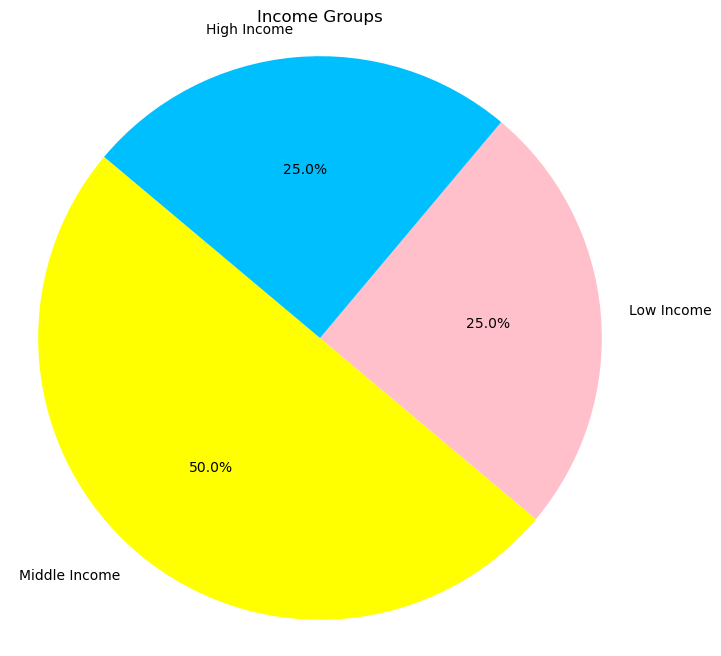

In [30]:
# Calculate counts for each income group
income_group_counts = customer_profiling_table['income_group'].value_counts()

# Define colors for the pie chart
colors = ['yellow', 'pink', 'deepskyblue']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_group_counts, labels=income_group_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Income Groups')
plt.axis('equal')  

In [31]:
# saving the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income Groups Pie Chart.png'))

<Figure size 640x480 with 0 Axes>

#### AGE GROUPS PIE CHART 

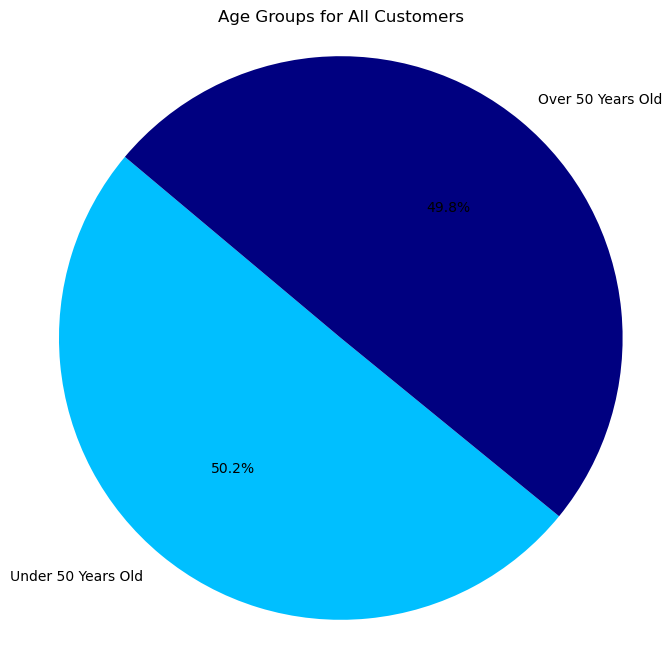

In [32]:
# Calculate counts for each age group
age_group_counts = customer_profiling_table['age_group'].value_counts()

# Define colors for the pie chart
colors = ['deepskyblue', 'navy'] 

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Age Groups for All Customers')
plt.axis('equal') 

# saving the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age Groups Pie Chart.png'))

#### KIDS/ NO KIDS PIE CHART 

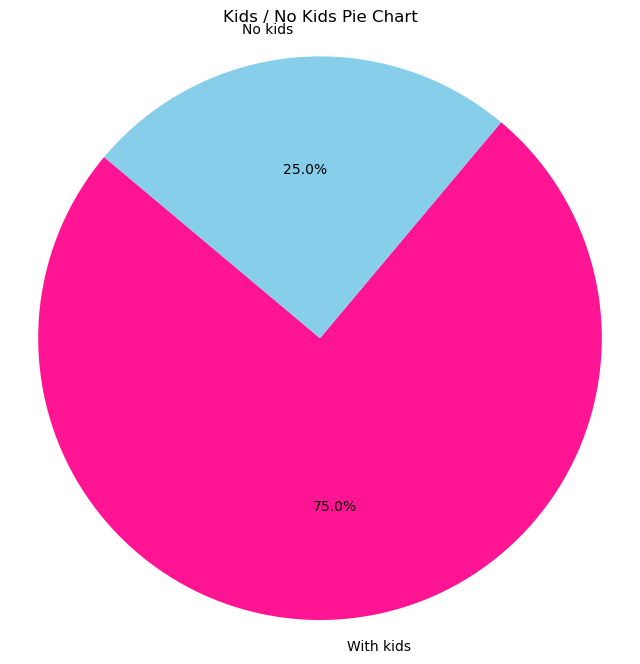

In [33]:
# Calculate counts for each kid status
kids_counts = customer_profiling_table['kids'].value_counts()

# Define colors for the pie chart
colors = ['deeppink', 'skyblue'] 

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(kids_counts, labels=kids_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Kids / No Kids Pie Chart')
plt.axis('equal')

# saving the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Kids, No Kids Pie Chart.png'))

#### BAR CHART PROFILING BASED ON NUMBER OF CHILDREN, FAMILY STATUS AND AGE

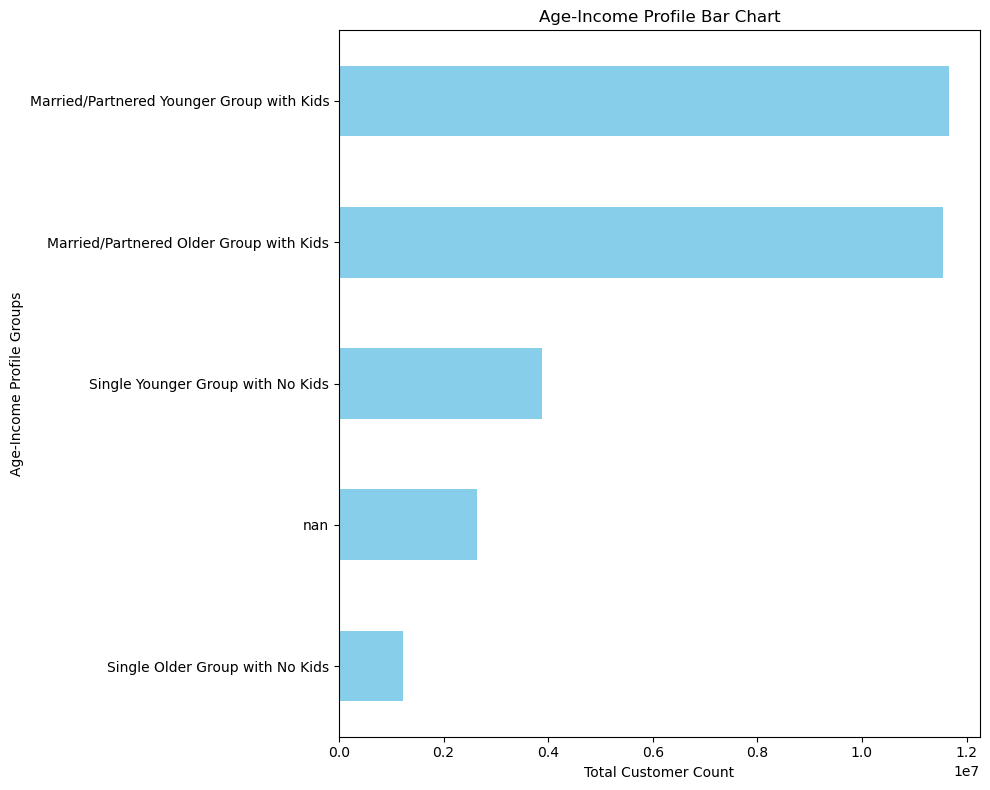

In [34]:
# Calculate counts for each age-income profile group
age_income_profile_counts = customer_profiling_table['age_status_profile'].value_counts()

# Define colors for the bar chart
colors = ['skyblue'] * len(age_income_profile_counts) 

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8)) 
age_income_profile_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Age-Income Profile Bar Chart')
plt.xlabel('Total Customer Count')
plt.ylabel('Age-Income Profile Groups')
plt.tight_layout()  

# saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age-Income Profile Bar Chart.png'))

For Some Age-Income Profile Groups we do not have data, therefore they are indicated with NA variables

#### BAR CHART PROFILING BASED ON AGE AND INCOME

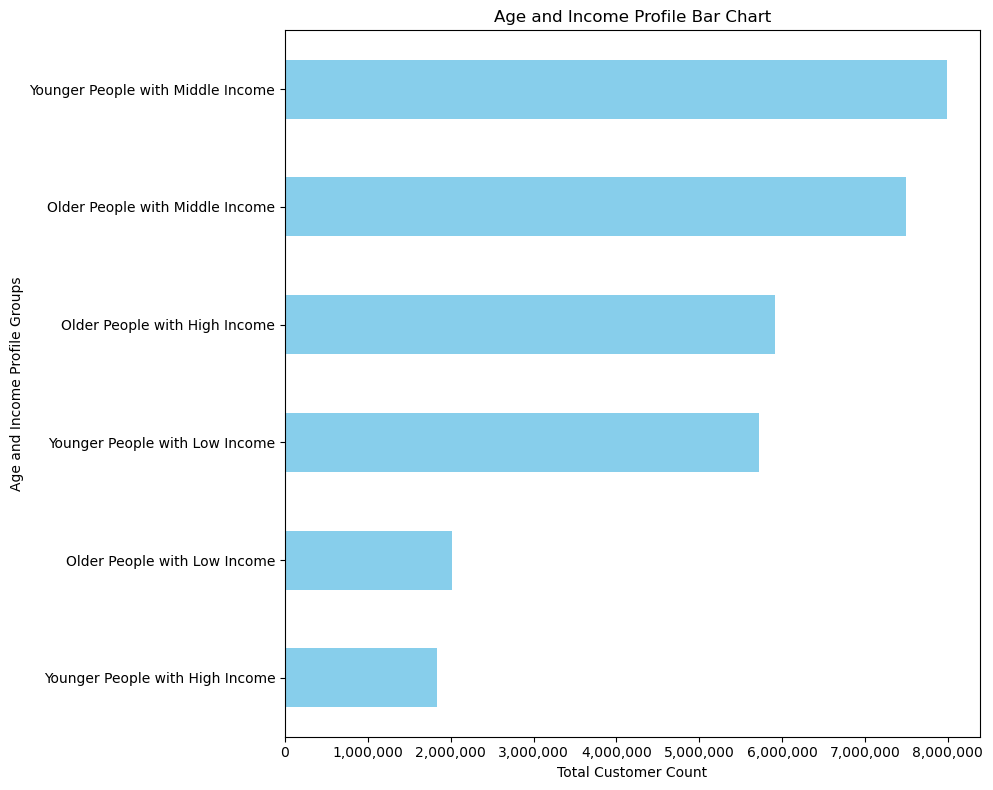

In [35]:
# Calculate counts for each age-income profile group
age_income_profile_counts = customer_profiling_table['age_income_profile'].value_counts()

# Define colors for the bar chart
colors = ['skyblue'] * len(age_income_profile_counts)  

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))  
age_income_profile_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Age and Income Profile Bar Chart')
plt.xlabel('Total Customer Count')
plt.ylabel('Age and Income Profile Groups')
plt.tight_layout() 

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Save the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age and Income Profile Bar Chart.png'))

#### Additional Customer Profile: Comparing of different Income Groups around departments and products

In [36]:
# Group by 'Age and Income Profile' and 'department'
customers_profile_income_department = customer_profiling_table.groupby(['age_income_profile','department']).size().unstack()

In [37]:
# Sort by ascending array
customers_profile_income_department = customers_profile_income_department.loc[customers_profile_income_department.sum(axis = 1).sort_values(ascending = True).index]

In [38]:
# Checking the results 
customers_profile_income_department.head(20)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_income_profile,,,,,,,,,,,,,,,,,,,,,
Younger People with High Income,12159,24626,69157,146597,39166,1635,62875,316496,59275,50108,...,44063,15578,43874,3920,2066,108707,25008,6684,527644,143174
Older People with Low Income,10643,16264,63439,230322,54581,2753,46616,300899,62684,38611,...,52467,12679,20675,3994,2249,99675,29353,4940,499855,334215
Younger People with Low Income,26182,67571,201388,512883,132981,6647,175861,928353,185470,141384,...,130966,45048,106916,11944,6330,318231,78399,16812,1624907,625092
Older People with High Income,28703,81048,221266,471920,123711,5906,202986,997512,191741,162813,...,133194,49762,139006,12414,6645,348467,81112,18260,1761928,458813
Older People with Middle Income,31188,104552,273510,588817,154310,7784,253945,1265532,245165,208834,...,164274,63931,178287,15288,8169,440923,100975,23458,2256764,584354
Younger People with Middle Income,35752,116331,292068,621362,166101,8726,269791,1368390,259499,220386,...,174893,68993,186023,17208,8952,466702,109459,22906,2408175,620758


<Figure size 1000x600 with 0 Axes>

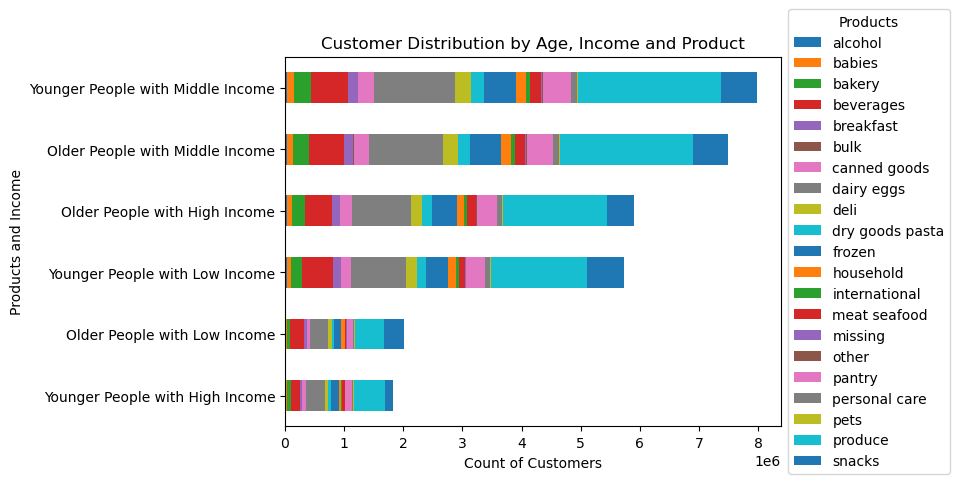

In [39]:
# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
customers_profile_income_department.plot(kind='barh', stacked=True)
plt.xlabel('Count of Customers')
plt.ylabel('Products and Income')
plt.title('Customer Distribution by Age, Income and Product')
plt.legend(title='Products', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Distribution by Age, Income and Product.png'))

#### Additional pie chart, which shows the number of customers between regions

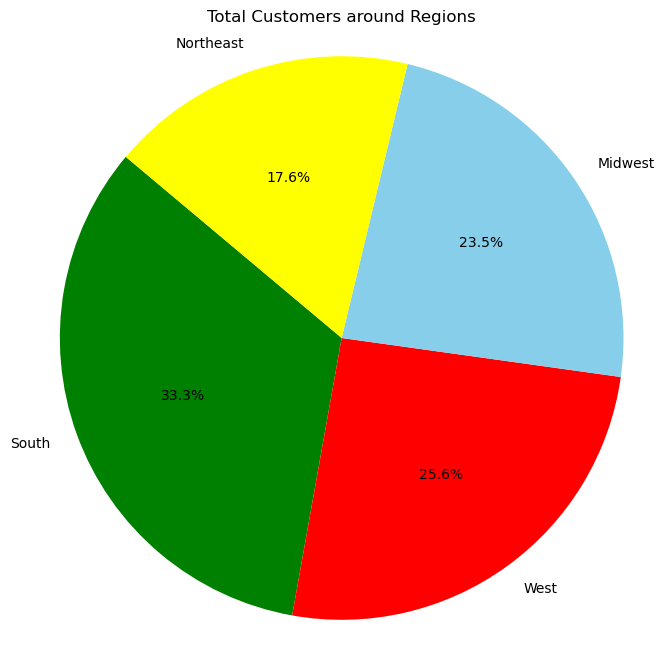

In [40]:
region_counts = customer_profiling_table['region_loc'].value_counts()

# Define colors for the pie chart
colors = ['green', 'red', 'skyblue', 'yellow']

# Plot the pie chart
plt.figure(figsize=(8, 8))  
plt.pie(region_counts, labels=region_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Customers around Regions')
plt.axis('equal')  

# Save the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regions Pie Chart.png'))

# STEP 7

In [41]:
customer_profiling_table.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency', 'region_loc',
       'exclusion_flag', 'department', 'age_group', 'income_group', 'kids',
       'age_status_profile', 'age_income_profile'],
      dtype='object')

In [42]:
# Using Groupby Function for aggregation for age_income_profile
age_income_profile_agg = customer_profiling_table.groupby('age_income_profile')[['days_since_prior_order','prices']].agg(['min','max','mean',])

In [43]:
age_income_profile_agg.head(6)

days_since_prior_order                   \
                                                     min   max       mean   
age_income_profile                                                          
Older People with High Income                        0.0  30.0  10.748080   
Older People with Low Income                         0.0  30.0  11.063316   
Older People with Middle Income                      0.0  30.0  10.799028   
Younger People with High Income                      0.0  30.0  10.782298   
Younger People with Low Income                       0.0  30.0  10.926522   
Younger People with Middle Income                    0.0  30.0  10.726634   

                                  prices                      
                                     min      max       mean  
age_income_profile                                            
Older People with High Income        1.0  99999.0  17.160118  
Older People with Low Income         1.0     25.0   6.705202  
Older People with Middle Income      1.0  99999.0   8.821732  
Younger People with High Income      1.0  99999.0  37.544000  
Younger People with Low Income       1.0  14900.0   7.522775  
Younger People with Middle Income    1.0  99999.0   9.596622

In [44]:
# Using Groupby Function for aggregation for age_status_profile
age_status_profile_agg = customer_profiling_table.groupby('age_status_profile')[['days_since_prior_order','prices']].agg(['min','max','mean',])

In [45]:
age_status_profile_agg.head(4)

days_since_prior_order        \
                                                             min   max   
age_status_profile                                                       
Married/Partnered Older Group with Kids                      0.0  30.0   
Married/Partnered Younger Group with Kids                    0.0  30.0   
Single Older Group with No Kids                              0.0  30.0   
Single Younger Group with No Kids                            0.0  30.0   

                                                     prices           \
                                                mean    min      max   
age_status_profile                                                     
Married/Partnered Older Group with Kids    10.845599    1.0  99999.0   
Married/Partnered Younger Group with Kids  10.787561    1.0  99999.0   
Single Older Group with No Kids            10.651966    1.0  99999.0   
Single Younger Group with No Kids          10.864514    1.0  99999.0   

                                                      
                                                mean  
age_status_profile                                    
Married/Partnered Older Group with Kids    11.828157  
Married/Partnered Younger Group with Kids  11.925640  
Single Older Group with No Kids            11.380459  
Single Younger Group with No Kids          12.719216

Comparing these two statistical table, we cannot identify a very huge difference between them. We can see that people with higher incomes do pay higher prices than those, who have middle or low income. If we take a look at the marriage status and kids/no kids presence, we will not see a significant difference. 

# STEP 8-10

In [46]:
# Check the age_income_profile across regions by creating a crosstab
crosstab_age_income_profile_region = pd.crosstab(customer_profiling_table['age_income_profile'], customer_profiling_table['region_loc'], dropna = False)

In [47]:
crosstab_age_income_profile_region

region_loc,Midwest,Northeast,South,West
age_income_profile,,,,
Older People with High Income,1405113,1050357,1953397,1501477
Older People with Low Income,459228,359642,672642,522420
Older People with Middle Income,1739370,1323383,2475729,1953517
Younger People with High Income,436725,322481,595870,475671
Younger People with Low Income,1331442,1007432,1920921,1467621
Younger People with Middle Income,1889635,1401390,2692580,2006521


In all regions predominate these groups: Younger People with Middle Income, Older People with High Income, Older People with Middle Income.	

<Figure size 1000x600 with 0 Axes>

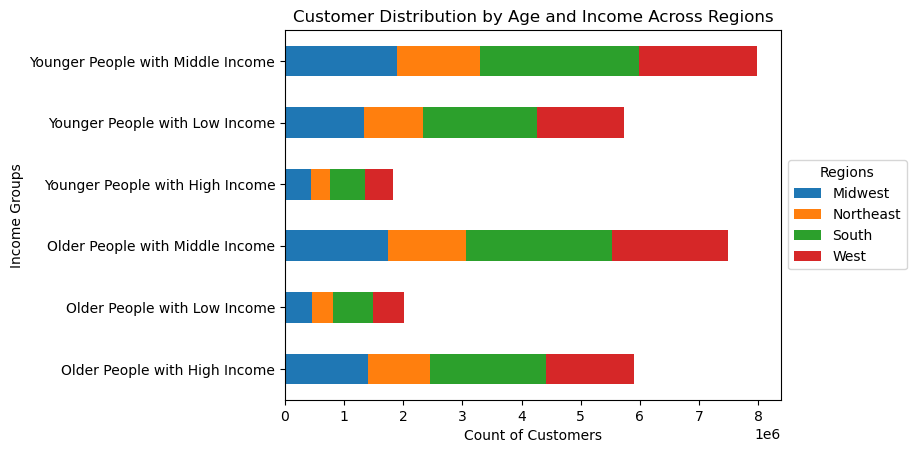

In [48]:
# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
crosstab_age_income_profile_region.plot(kind='barh', stacked=True)
plt.xlabel('Count of Customers')
plt.ylabel('Income Groups')
plt.title('Customer Distribution by Age and Income Across Regions')
plt.legend(title='Regions', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Distribution by Age and Income Across Regions.png'))

In [49]:
# Check the age_status_profile across regions by creating a crosstab
crosstab_age_status_profile_profile_region = pd.crosstab(customer_profiling_table['age_status_profile'], customer_profiling_table['region_loc'], dropna = False)

In [50]:
crosstab_age_status_profile_profile_region.head(4)

region_loc,Midwest,Northeast,South,West
age_status_profile,,,,
Married/Partnered Older Group with Kids,2691395,2051392,3838838,2969278
Married/Partnered Younger Group with Kids,2747302,2058811,3890368,2977499
Single Older Group with No Kids,295118,203223,385616,336144
Single Younger Group with No Kids,910500,672492,1319003,972314


Married/Partnered with kids is a predominant group in every region. 

<Figure size 1000x600 with 0 Axes>

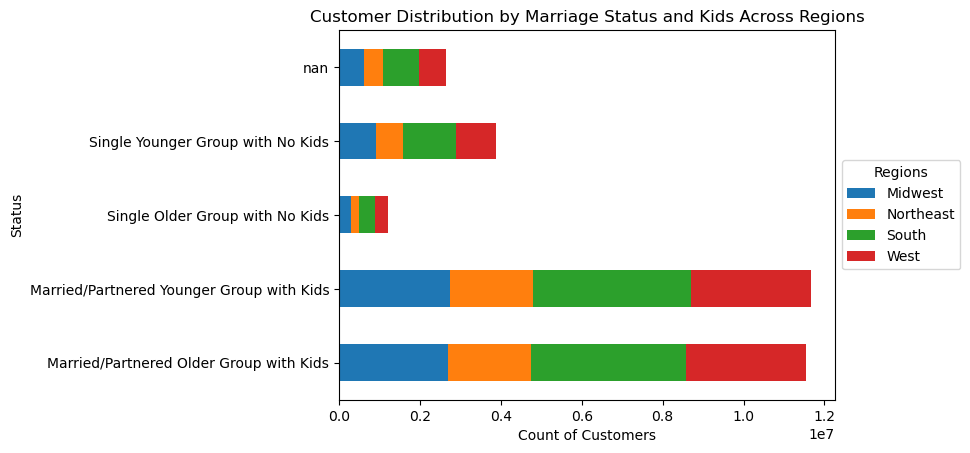

In [51]:
# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
crosstab_age_status_profile_profile_region.plot(kind='barh', stacked=True)
plt.xlabel('Count of Customers')
plt.ylabel('Status')
plt.title('Customer Distribution by Marriage Status and Kids Across Regions')
plt.legend(title='Regions', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Distribution by Marriage Status and Kids Across Regions.png'))

In [52]:
# Exporting customer_profiling_table as Pickle
customer_profiling_table.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_profiling_table.pkl'))

#### Additional Chart / Loyal Customers Preferences across regions

In [59]:
# Creating a new crosstab loyalty_flag_region
crosstab_loyalty_flag_region = pd.crosstab(customer_profiling_table['loyalty_flag'], customer_profiling_table['region_loc'], dropna=False)

# Display the crosstab
print(crosstab_loyalty_flag_region)

region_loc        Midwest  Northeast    South     West
loyalty_flag                                          
Loyal customer    2373774    1841785  3405844  2662690
New customer      1136761     842156  1593664  1231114
Regular customer  3750978    2780744  5311631  4033423


<Figure size 1000x600 with 0 Axes>

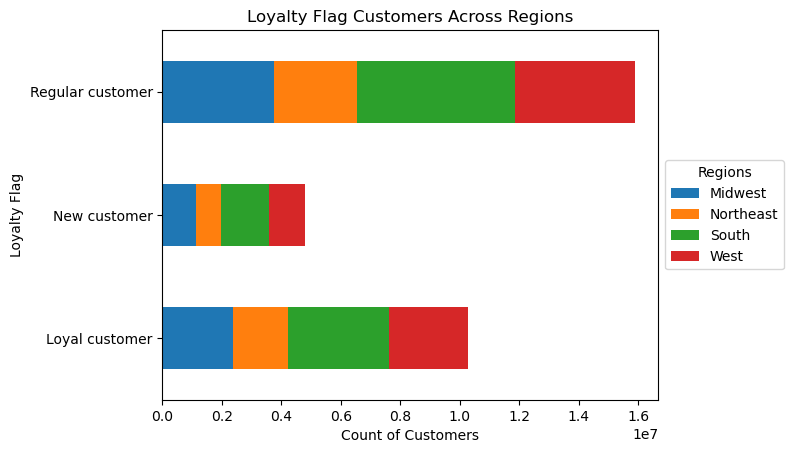

In [61]:
# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
crosstab_loyalty_flag_region .plot(kind='barh', stacked=True)
plt.xlabel('Count of Customers')
plt.ylabel('Loyalty Flag')
plt.title('Loyalty Flag Customers Across Regions')
plt.legend(title='Regions', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyal Customers Across Regions.png'))

In [60]:
# Creating a new crosstab loyalty_flag_department
crosstab_loyalty_flag_department = pd.crosstab(customer_profiling_table['loyalty_flag'], customer_profiling_table['department'], dropna=False)

# Display the crosstab
print(crosstab_loyalty_flag_department)

department        alcohol  babies  bakery  beverages  breakfast   bulk  \
loyalty_flag                                                             
Loyal customer      38723  167108  379873     855017     221577  13834   
New customer        28629   46708  172104     396649     106179   4149   
Regular customer    77275  196576  568851    1320235     343094  15468   

department        canned goods  dairy eggs    deli  dry goods pasta  ...  \
loyalty_flag                                                         ...   
Loyal customer          294594     1830707  324046           242580  ...   
New customer            180196      750056  158335           144836  ...   
Regular customer        537284     2596419  521453           434720  ...   

department        household  international  meat seafood  missing  other  \
loyalty_flag                                                               
Loyal customer       196873          78394        202480    18350  10715   
New customer        

<Figure size 1000x600 with 0 Axes>

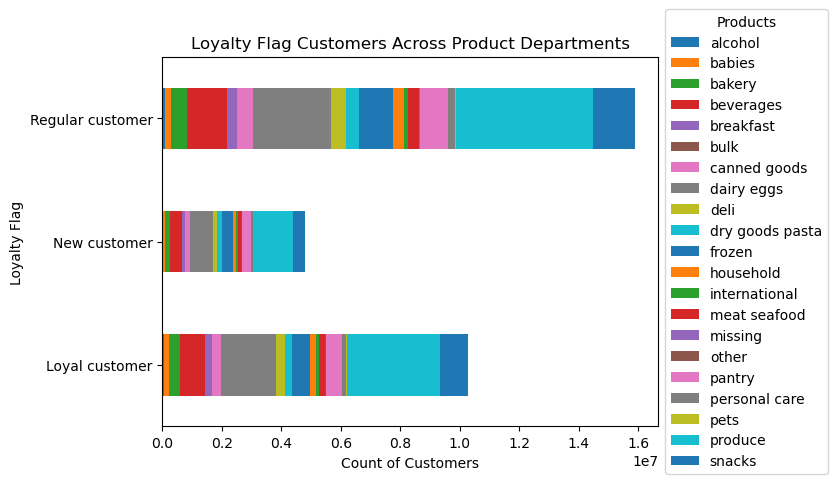

In [63]:
# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
crosstab_loyalty_flag_department.plot(kind='barh', stacked=True)
plt.xlabel('Count of Customers')
plt.ylabel('Loyalty Flag')
plt.title('Loyalty Flag Customers Across Product Departments')
plt.legend(title='Products', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyal Customers And Products.png'))